# Γραμμική παλινδρόμηση & Δέντρα αποφάσεων

Θα συγκρίνουμε τις 2 μεθόδους μηχανικής μάθησης.


###  Πάμε να χρησιμοποιήσουμε ξανά τα California housing data, αλλά αυτή τη φορά θα δούμε και τα Δέντρα αποφάσεων (Desicion Trees). 


## Επανάληψη: Γραμμική παλινδρόμηση 

Εισαγωγή των απαραίτητων πακέτων και βιβλιοθηκών

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
print(housing.DESCR) 

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
print(housing.keys())
print(housing.data.shape) 

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
(20640, 8)


In [5]:
# Βάζουμε τα data σε DataFrame
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
# προσθέτουμε το target στο DataFrame
housing_df['PRICE'] = pd.DataFrame(housing.target)

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Στο σημείο αυτό θα χωρίσουμε (split) τα δεδομένα σε σύνολο εκπαίδευσης (train set) και σύνολο δοκιμής (test set).

In [6]:
#split
california_train, california_test = train_test_split(housing_df, random_state=42)

In [7]:
# Βάζουμε όλα τα features στο X_train και βγάζουμε το PRICE γιατί είναι το target
X_train = california_train.drop(columns='PRICE')
# Το target 'price' στο y_train
y_train = california_train['PRICE']

# Βάζουμε όλα τα features στο X_train και βγάζουμε το PRICE γιατί είναι το target
X_test = california_test.drop(columns = 'PRICE')
# Το target 'price' στο y_train
y_test = california_test['PRICE']

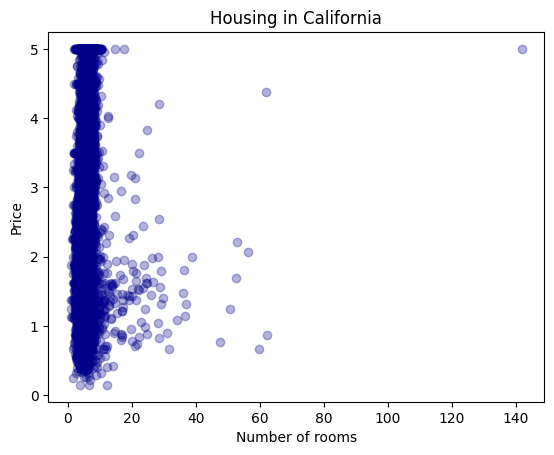

In [8]:
# Οπτικοποίηση με scatter plot
s1 = plt.scatter(X_train['AveRooms'], y_train, color='darkblue', marker='o', alpha = 0.3)
# labels
plt.xlabel('Number of rooms')  # Set xlabel
plt.ylabel('Price') # Set ylabel
# title
plt.title('Housing in California') # Set title
# final plot
plt.show()

## Επανάληψη: Κάνουμε fit το linear regression model

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lm = LinearRegression()
# εκπαίδευση 
lm.fit(X_train, y_train)
# Φτιάχνει τις προβλέψεις με το test  data-set
y_pred = lm.predict(X_test)
# υπολογισμός MSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# υπολογισμός R squared
r2 = round(r2_score(y_test, y_pred),2)  
# Coefficients 
b = lm.coef_
# Intercept
d = lm.intercept_
# Γράφουμε σε κείμενο τα λάθη
txt = "R2 = {} \nRMSE = {} \ncoef = {} \nintercept = {}"
# και τα τυπώνουμε
print(txt.format(r2, rmse, b, d))

R2 = 0.59 
RMSE = 0.7356145375446766 
coef = [ 4.47600069e-01  9.56752596e-03 -1.24755956e-01  7.94471254e-01
 -1.43902596e-06 -3.44307993e-03 -4.18555257e-01 -4.33405135e-01] 
intercept = -37.02782758526926


### Αποτελέσματα του μοντέλου, πόσο καλά τα πήγε?

Πώς περιμένετε ότι θα είναι η γραμμή? και πόσο καλά εξηγεί τα δεδομένα?

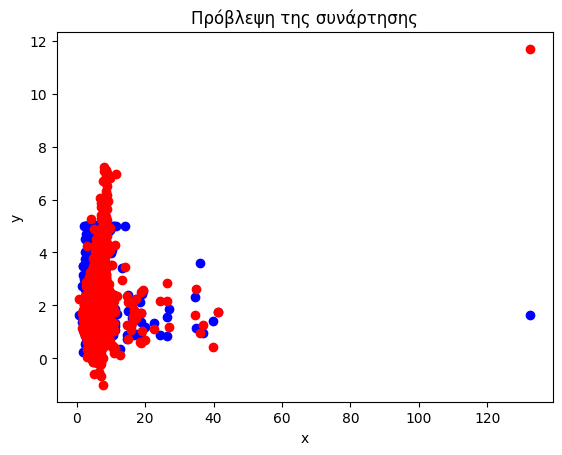

In [11]:
s1 = plt.scatter(X_test['AveRooms'], y_test, color='b', marker='o')

plt.xlabel('x')

plt.ylabel('y')

plt.title('Πρόβλεψη της συνάρτησης')
# προσθέτουμε τη γραμμή

plt.scatter(X_test['AveRooms'], y_pred, color='red')

plt.show()

Όπως βλέπουμε η γραμμική παλινδρόμηση δεν μπορεί να πιάσει την συγκεκριμένη δομή δεδομένων. 


Πάμε λοιπόν να δοκιμάσουμε μη γραμμικά μοντέλα:

## Δέντρα αποφάσεων


In [12]:
# Εισάγουμε τον regressor από το scikit-learn
from sklearn.tree import DecisionTreeRegressor

In [13]:
# Decision Tree με max depth 2
#regr_tree = DecisionTreeRegressor(max_depth=8)
regr_tree = DecisionTreeRegressor(min_samples_leaf = 8) 

In [14]:
# Fit το decision tree model
regr_tree.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=8)

In [15]:
# predictions
y_pred = regr_tree.predict(X_test)
# Print predictions
print(y_pred)

[0.43999889 0.75175    5.00001    ... 1.38444444 2.19391667 4.37650375]


In [16]:
# λάθος MSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# λάθος R squared
r2 = round(r2_score(y_test, y_pred),2)  

txt_one_feature = "R2 = {} \nRMSE = {}"


print(txt_one_feature.format(r2, rmse))

R2 = 0.71 
RMSE = 0.6246401199194116


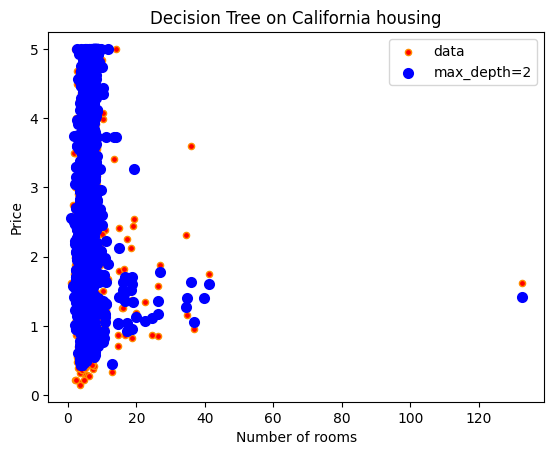

In [17]:
# Οπτικοποίηση αποτελεσμάτων 
plt.figure()
plt.scatter(X_test['AveRooms'], y_test, s=20, edgecolor="darkorange",
            c="r", label="data")
plt.scatter(X_test['AveRooms'], y_pred, color="b", label="max_depth=2", linewidth=2)
plt.xlabel("Number of rooms")
plt.ylabel("Price")
plt.title("Decision Tree on California housing")
plt.legend()
#final plot
plt.show()

Είδαμε ότι το βάθος των δέντρων επηρεάζει δραστικά την απόδοση. Βέβαια όταν υπάρχουν ακραία στοιχεία δεν είναι καλό το δέντρο να εκπαιδεύεται πολύ καλά σε αυτά, καθώς μετά κάνει overfit. Επίσης, είδαμε ότι αν περιορίσουμε το δέντρο μας πολύ τότε πάλι δεν έχουμε καλές προβλέψεις. Η διαδικασία με την οποία προσπαθούμε να φτιάξουμε το τέλειο μοντέλο λέγεται hyperparameter optimization. Αυτό θα το δούμε στα επόμενα μαθήματα. 

In [18]:
from sklearn.tree import plot_tree


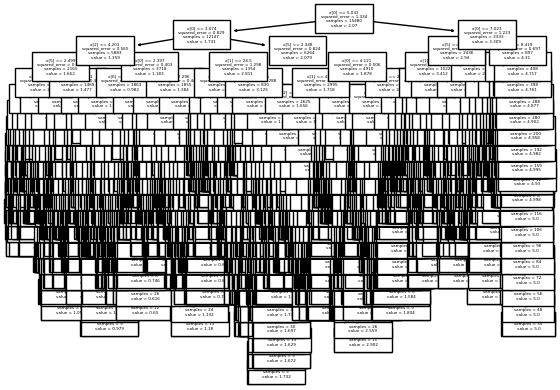

<Figure size 10000x10000 with 0 Axes>

In [29]:
#tree plot
plot_tree(regr_tree, fontsize=3)
plt.figure(figsize=(100,100))

plt.show()

Δοκιμάστε διαφορετικό βάθος δέντρων για να βρείτε διαφορές. 
Γενικά παρατηρούμε ότι με το decision tree παίρνουμε κοντινά αποτελέσματα όπως και στο γραμμικό μοντέλο αλλά εξηγεί μεγαλύτερο variance σε σχέση με το γραμμικό μοντέλο.

In [24]:
# visualizing our decision tree 
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(regr_tree)
graphviz.Source(export_graphviz(regr_tree,
                                out_file=None,
                                feature_names=X_train.columns,
                                class_names=["0", "1"],
                                node_ids = True,
                                impurity=True))

## Συζήτηση

Όταν βάλαμε τα υπόλοιπα features βελτιώνονται οι προβλέψεις (χρησιμοποιώντας το ίδιο βάθος). Επίσης, όσο μεγαλώνουμε το βάθος τα δεδομένα κάνουν καλύτερο fit και πλησιάζουμε πιο κοντά στο ιδανικό R² = 1.
Παρόλα αυτά αυτό που συμβαίνει μέχρι τώρα είναι ότι κάνουμε overfit τα data. Υποθέτοντας ότι εκπαιδεύσαμε το μοντέλο με ΟΛΑ τα δεδομένα, όταν ένα νέο σπίτι βγει στην πώληση, το μοντέλο μας δεν θα καταφέρει να προβλέψει σωστά εφόσον δεν έχει ξαναδεί το συγκεκριμένο σπίτι.

Υπάρχουν φυσικά τρόποι να  κάνουμε το μοντέλο μας  γενικεύσιμο και αυτό θα το μάθουμε στο μάθημα. 